<a href="https://colab.research.google.com/github/muoyo/chicago-ridesharing/blob/anesu/Chicago_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install sodapy

In [0]:
#!/usr/bin/env python

# make sure to install these packages before running:
# pip install pandas
# pip install sodapy

import pandas as pd
from sodapy import Socrata

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
#client = Socrata("data.cityofchicago.org", None, timeout=100)

#Example authenticated client (needed for non-public datasets):
client = Socrata("data.cityofchicago.org",
                 "N0amD6E3UkUmVTl5nFWXbIyl4",
                 username="anesumasube@gmail.com",
                 password="Marywandi11!", timeout=1000)

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("m6dm-c72p",limit=1000000, select='trip_id, trip_start_timestamp, trip_end_timestamp, trip_seconds, trip_miles, pickup_community_area, dropoff_community_area, fare, tip, additional_charges, trip_total ')
# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)

In [3]:
results_df.describe()

,trip_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_community_area,dropoff_community_area,fare,tip,additional_charges,trip_total
count,1000000,1000000,1000000,992543,999915,938493,931130,1000000,1000000,1000000,1000000
unique,1000000,8889,8891,4988,736722,77,77,107,48,1357,8620
top,cf83dfbc5115e37eb8148ceeca63d447a564c854,2019-06-28T19:15:00.000,2019-06-06T00:00:00.000,900,0,8,8,5,0,2.55,7.55
freq,1,279,7522,2072,187,163990,156491,212312,811587,737776,155640


In [4]:
results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 11 columns):
trip_id                   1000000 non-null object
trip_start_timestamp      1000000 non-null object
trip_end_timestamp        1000000 non-null object
trip_seconds              992543 non-null object
trip_miles                999915 non-null object
pickup_community_area     938493 non-null object
dropoff_community_area    931130 non-null object
fare                      1000000 non-null object
tip                       1000000 non-null object
additional_charges        1000000 non-null object
trip_total                1000000 non-null object
dtypes: object(11)
memory usage: 83.9+ MB


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import datetime 

In [0]:
results_df['trip_start_timestamp']= pd.to_datetime(results_df['trip_start_timestamp'])
results_df['trip_end_timestamp']= pd.to_datetime(results_df['trip_end_timestamp'])


for col in ['trip_miles','pickup_community_area','dropoff_community_area','fare','tip','additional_charges','trip_total']:
    results_df[col]= results_df[col].astype(float)

In [7]:
results_df.head()

,trip_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_community_area,dropoff_community_area,fare,tip,additional_charges,trip_total
0,cc939acf64f21305eca5640b2b567abdc5000b90,2019-05-16 21:15:00,2019-05-16 21:30:00,912,5.604046,22.0,7.0,7.5,0.0,2.55,10.05
1,cc939b3127cffad4f5953f2026a9f29a6e541db3,2019-04-08 06:15:00,2019-04-08 06:45:00,1479,6.717380,24.0,25.0,20.0,0.0,2.55,22.55
2,cc939b5d5a22829b521cec2fdfb323ab94b499a1,2019-04-05 12:00:00,2019-04-05 12:15:00,1058,9.296296,49.0,40.0,5.0,0.0,2.55,7.55
3,cc939b65995b709363666c478342855bb5fa2f06,2019-04-04 07:45:00,2019-04-04 08:30:00,2404,8.352627,21.0,32.0,15.0,0.0,2.55,17.55
4,cc939b85f4141567e3c53d634c5a0c2388ec3347,2019-06-14 22:45:00,2019-06-14 23:00:00,486,1.451151,32.0,33.0,15.0,0.0,2.55,17.55


In [0]:
results_df['trip_seconds']= results_df['trip_seconds'].astype(float)

In [9]:
results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 11 columns):
trip_id                   1000000 non-null object
trip_start_timestamp      1000000 non-null datetime64[ns]
trip_end_timestamp        1000000 non-null datetime64[ns]
trip_seconds              992543 non-null float64
trip_miles                999915 non-null float64
pickup_community_area     938493 non-null float64
dropoff_community_area    931130 non-null float64
fare                      1000000 non-null float64
tip                       1000000 non-null float64
additional_charges        1000000 non-null float64
trip_total                1000000 non-null float64
dtypes: datetime64[ns](2), float64(8), object(1)
memory usage: 83.9+ MB


In [0]:
import seaborn as sns

In [0]:
#results_df.drop(columns='trip_id')

In [12]:
results_df.head()

,trip_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_community_area,dropoff_community_area,fare,tip,additional_charges,trip_total
0,cc939acf64f21305eca5640b2b567abdc5000b90,2019-05-16 21:15:00,2019-05-16 21:30:00,912.0,5.604046,22.0,7.0,7.5,0.0,2.55,10.05
1,cc939b3127cffad4f5953f2026a9f29a6e541db3,2019-04-08 06:15:00,2019-04-08 06:45:00,1479.0,6.717380,24.0,25.0,20.0,0.0,2.55,22.55
2,cc939b5d5a22829b521cec2fdfb323ab94b499a1,2019-04-05 12:00:00,2019-04-05 12:15:00,1058.0,9.296296,49.0,40.0,5.0,0.0,2.55,7.55
3,cc939b65995b709363666c478342855bb5fa2f06,2019-04-04 07:45:00,2019-04-04 08:30:00,2404.0,8.352627,21.0,32.0,15.0,0.0,2.55,17.55
4,cc939b85f4141567e3c53d634c5a0c2388ec3347,2019-06-14 22:45:00,2019-06-14 23:00:00,486.0,1.451151,32.0,33.0,15.0,0.0,2.55,17.55


In [0]:
results_df.to_csv('rideshare1.csv', index=False)

In [14]:
!pwd

/content


In [15]:
! ~

/bin/bash: /root: Is a directory


In [16]:
ride_data = results_df.iloc[:200001,1:7]
ride_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200001 entries, 0 to 200000
Data columns (total 6 columns):
trip_start_timestamp      200001 non-null datetime64[ns]
trip_end_timestamp        200001 non-null datetime64[ns]
trip_seconds              198580 non-null float64
trip_miles                199976 non-null float64
pickup_community_area     187794 non-null float64
dropoff_community_area    186061 non-null float64
dtypes: datetime64[ns](2), float64(4)
memory usage: 9.2 MB


/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


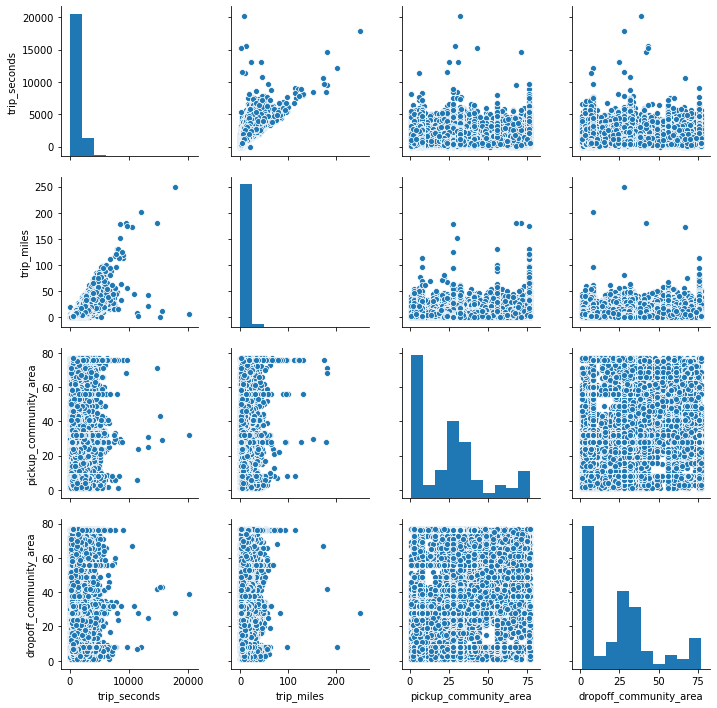

In [17]:
sns.pairplot(ride_data)

In [18]:
ride_data.corr()

,trip_seconds,trip_miles,pickup_community_area,dropoff_community_area
trip_seconds,1.000000,0.81580,0.200507,0.229189
trip_miles,0.815800,1.00000,0.294580,0.336940
pickup_community_area,0.200507,0.29458,1.000000,0.288433
dropoff_community_area,0.229189,0.33694,0.288433,1.000000


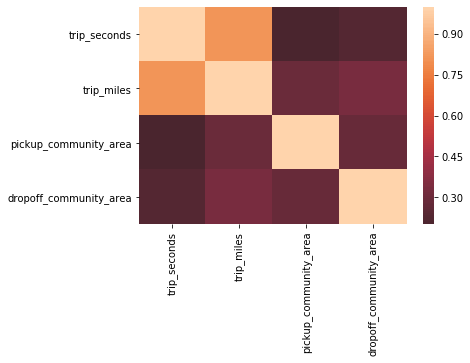

In [19]:
sns.heatmap(ride_data.corr(), center=0)

In [0]:
results_df['start_date'] = [d.date() for d in results_df['trip_start_timestamp']]
results_df['start_time'] = [d.time() for d in results_df['trip_start_timestamp']]

In [21]:
results_df.head()

,trip_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_community_area,dropoff_community_area,fare,tip,additional_charges,trip_total,start_date,start_time
0,cc939acf64f21305eca5640b2b567abdc5000b90,2019-05-16 21:15:00,2019-05-16 21:30:00,912.0,5.604046,22.0,7.0,7.5,0.0,2.55,10.05,2019-05-16,21:15:00
1,cc939b3127cffad4f5953f2026a9f29a6e541db3,2019-04-08 06:15:00,2019-04-08 06:45:00,1479.0,6.717380,24.0,25.0,20.0,0.0,2.55,22.55,2019-04-08,06:15:00
2,cc939b5d5a22829b521cec2fdfb323ab94b499a1,2019-04-05 12:00:00,2019-04-05 12:15:00,1058.0,9.296296,49.0,40.0,5.0,0.0,2.55,7.55,2019-04-05,12:00:00
3,cc939b65995b709363666c478342855bb5fa2f06,2019-04-04 07:45:00,2019-04-04 08:30:00,2404.0,8.352627,21.0,32.0,15.0,0.0,2.55,17.55,2019-04-04,07:45:00
4,cc939b85f4141567e3c53d634c5a0c2388ec3347,2019-06-14 22:45:00,2019-06-14 23:00:00,486.0,1.451151,32.0,33.0,15.0,0.0,2.55,17.55,2019-06-14,22:45:00


In [0]:
# from google.colab import drive
# drive.mount('drive')

In [0]:
# results_df.to_csv('ridedata.csv')
# !cp ridedata.csv "drive/My Drive/"

In [0]:
# from google.colab import drive
# drive.mount('/content/drive')

In [0]:
# from google.colab import drive
# drive.mount('/content/drive')

In [0]:
# results_df.to_csv('ridedata.csv')
# !cp ridedata.csv "content/drive/My Drive/"

In [27]:
results_df['end_date'] = [d.date() for d in results_df['trip_end_timestamp']]
results_df['end_time'] = [d.time() for d in results_df['trip_end_timestamp']]
results_df.head()

,trip_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_community_area,dropoff_community_area,fare,tip,additional_charges,trip_total,start_date,start_time,end_date,end_time
0,cc939acf64f21305eca5640b2b567abdc5000b90,2019-05-16 21:15:00,2019-05-16 21:30:00,912.0,5.604046,22.0,7.0,7.5,0.0,2.55,10.05,2019-05-16,21:15:00,2019-05-16,21:30:00
1,cc939b3127cffad4f5953f2026a9f29a6e541db3,2019-04-08 06:15:00,2019-04-08 06:45:00,1479.0,6.717380,24.0,25.0,20.0,0.0,2.55,22.55,2019-04-08,06:15:00,2019-04-08,06:45:00
2,cc939b5d5a22829b521cec2fdfb323ab94b499a1,2019-04-05 12:00:00,2019-04-05 12:15:00,1058.0,9.296296,49.0,40.0,5.0,0.0,2.55,7.55,2019-04-05,12:00:00,2019-04-05,12:15:00
3,cc939b65995b709363666c478342855bb5fa2f06,2019-04-04 07:45:00,2019-04-04 08:30:00,2404.0,8.352627,21.0,32.0,15.0,0.0,2.55,17.55,2019-04-04,07:45:00,2019-04-04,08:30:00
4,cc939b85f4141567e3c53d634c5a0c2388ec3347,2019-06-14 22:45:00,2019-06-14 23:00:00,486.0,1.451151,32.0,33.0,15.0,0.0,2.55,17.55,2019-06-14,22:45:00,2019-06-14,23:00:00


In [65]:
results_df['trip_start_timestamp'].value_counts()

2019-06-28 19:15:00    279
2019-05-03 18:30:00    277
2019-04-27 19:15:00    275
2019-04-27 19:30:00    272
2019-04-12 18:45:00    271
                      ... 
2019-06-30 08:00:00      1
2019-06-30 03:00:00      1
2019-06-30 05:45:00      1
2019-06-30 16:00:00      1
2019-06-30 13:00:00      1
Name: trip_start_timestamp, Length: 8889, dtype: int64

In [47]:
ride_df = results_df.iloc[:200000, 1:12]
ride_df.head()

,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_community_area,dropoff_community_area,fare,tip,additional_charges,trip_total,start_date
0,2019-05-16 21:15:00,2019-05-16 21:30:00,912.0,5.604046,22.0,7.0,7.5,0.0,2.55,10.05,2019-05-16
1,2019-04-08 06:15:00,2019-04-08 06:45:00,1479.0,6.717380,24.0,25.0,20.0,0.0,2.55,22.55,2019-04-08
2,2019-04-05 12:00:00,2019-04-05 12:15:00,1058.0,9.296296,49.0,40.0,5.0,0.0,2.55,7.55,2019-04-05
3,2019-04-04 07:45:00,2019-04-04 08:30:00,2404.0,8.352627,21.0,32.0,15.0,0.0,2.55,17.55,2019-04-04
4,2019-06-14 22:45:00,2019-06-14 23:00:00,486.0,1.451151,32.0,33.0,15.0,0.0,2.55,17.55,2019-06-14


In [48]:
ride_df['pickup_community_area'] = ride_df['pickup_community_area'].fillna(0)
ride_df.head()

,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_community_area,dropoff_community_area,fare,tip,additional_charges,trip_total,start_date
0,2019-05-16 21:15:00,2019-05-16 21:30:00,912.0,5.604046,22.0,7.0,7.5,0.0,2.55,10.05,2019-05-16
1,2019-04-08 06:15:00,2019-04-08 06:45:00,1479.0,6.717380,24.0,25.0,20.0,0.0,2.55,22.55,2019-04-08
2,2019-04-05 12:00:00,2019-04-05 12:15:00,1058.0,9.296296,49.0,40.0,5.0,0.0,2.55,7.55,2019-04-05
3,2019-04-04 07:45:00,2019-04-04 08:30:00,2404.0,8.352627,21.0,32.0,15.0,0.0,2.55,17.55,2019-04-04
4,2019-06-14 22:45:00,2019-06-14 23:00:00,486.0,1.451151,32.0,33.0,15.0,0.0,2.55,17.55,2019-06-14


In [49]:
ride_df['dropoff_community_area'] = ride_df['dropoff_community_area'].fillna(0)
ride_df.head()

,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_community_area,dropoff_community_area,fare,tip,additional_charges,trip_total,start_date
0,2019-05-16 21:15:00,2019-05-16 21:30:00,912.0,5.604046,22.0,7.0,7.5,0.0,2.55,10.05,2019-05-16
1,2019-04-08 06:15:00,2019-04-08 06:45:00,1479.0,6.717380,24.0,25.0,20.0,0.0,2.55,22.55,2019-04-08
2,2019-04-05 12:00:00,2019-04-05 12:15:00,1058.0,9.296296,49.0,40.0,5.0,0.0,2.55,7.55,2019-04-05
3,2019-04-04 07:45:00,2019-04-04 08:30:00,2404.0,8.352627,21.0,32.0,15.0,0.0,2.55,17.55,2019-04-04
4,2019-06-14 22:45:00,2019-06-14 23:00:00,486.0,1.451151,32.0,33.0,15.0,0.0,2.55,17.55,2019-06-14


In [50]:
ride_df['start_day'] = [d.weekday() for d in ride_df['trip_start_timestamp']]

ride_df.head()

,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_community_area,dropoff_community_area,fare,tip,additional_charges,trip_total,start_date,start_day
0,2019-05-16 21:15:00,2019-05-16 21:30:00,912.0,5.604046,22.0,7.0,7.5,0.0,2.55,10.05,2019-05-16,3
1,2019-04-08 06:15:00,2019-04-08 06:45:00,1479.0,6.717380,24.0,25.0,20.0,0.0,2.55,22.55,2019-04-08,0
2,2019-04-05 12:00:00,2019-04-05 12:15:00,1058.0,9.296296,49.0,40.0,5.0,0.0,2.55,7.55,2019-04-05,4
3,2019-04-04 07:45:00,2019-04-04 08:30:00,2404.0,8.352627,21.0,32.0,15.0,0.0,2.55,17.55,2019-04-04,3
4,2019-06-14 22:45:00,2019-06-14 23:00:00,486.0,1.451151,32.0,33.0,15.0,0.0,2.55,17.55,2019-06-14,4


In [51]:
ride_df['start_time'] = [d.hour for d in ride_df['trip_start_timestamp']]
ride_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 13 columns):
trip_start_timestamp      200000 non-null datetime64[ns]
trip_end_timestamp        200000 non-null datetime64[ns]
trip_seconds              198579 non-null float64
trip_miles                199975 non-null float64
pickup_community_area     200000 non-null float64
dropoff_community_area    200000 non-null float64
fare                      200000 non-null float64
tip                       200000 non-null float64
additional_charges        200000 non-null float64
trip_total                200000 non-null float64
start_date                200000 non-null object
start_day                 200000 non-null int64
start_time                200000 non-null int64
dtypes: datetime64[ns](2), float64(8), int64(2), object(1)
memory usage: 19.8+ MB


In [0]:
ride_df['time_block'] = ride_df['start_time']//3

In [53]:
ride_df.head()

,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_community_area,dropoff_community_area,fare,tip,additional_charges,trip_total,start_date,start_day,start_time,time_block
0,2019-05-16 21:15:00,2019-05-16 21:30:00,912.0,5.604046,22.0,7.0,7.5,0.0,2.55,10.05,2019-05-16,3,21,7
1,2019-04-08 06:15:00,2019-04-08 06:45:00,1479.0,6.717380,24.0,25.0,20.0,0.0,2.55,22.55,2019-04-08,0,6,2
2,2019-04-05 12:00:00,2019-04-05 12:15:00,1058.0,9.296296,49.0,40.0,5.0,0.0,2.55,7.55,2019-04-05,4,12,4
3,2019-04-04 07:45:00,2019-04-04 08:30:00,2404.0,8.352627,21.0,32.0,15.0,0.0,2.55,17.55,2019-04-04,3,7,2
4,2019-06-14 22:45:00,2019-06-14 23:00:00,486.0,1.451151,32.0,33.0,15.0,0.0,2.55,17.55,2019-06-14,4,22,7


In [62]:
ride_df['start_date'].value_counts()

2019-04-27    2830
2019-05-18    2818
2019-06-15    2798
2019-05-04    2781
2019-03-30    2774
              ... 
2019-04-16    1743
2019-06-08    1615
2019-04-24    1587
2019-05-27    1580
2019-06-30      47
Name: start_date, Length: 93, dtype: int64

In [0]:
ride_df['pickup_community_area'] = ride_df['pickup_community_area'].astype('int64')

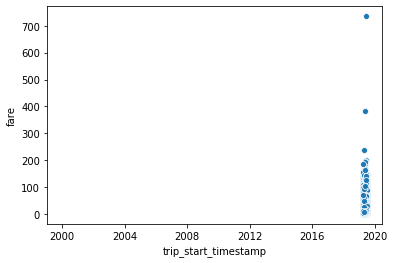

In [68]:
sns.scatterplot(ride_df['trip_start_timestamp'], ride_df['fare'])

In [36]:
ind_var = ride_df.iloc[:,4:9]
ind_var =ind_var.drop(columns='fare')
ind_var.head()

,pickup_community_area,dropoff_community_area,tip,additional_charges
0,22,7.0,0.0,2.55
1,24,25.0,0.0,2.55
2,49,40.0,0.0,2.55
3,21,32.0,0.0,2.55
4,32,33.0,0.0,2.55


In [0]:
ind_var = ind_var.drop(columns='dropoff_community_area')

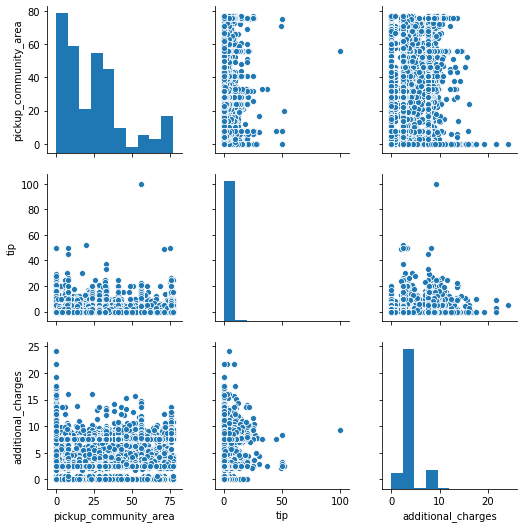

In [38]:
sns.pairplot(ind_var)

**One Hot Encode the categorical variables**

In [39]:
# assign the categorical variables to encode
X = ride_df[[ 'start_day', 'time_block', 'pickup_community_area']]
X.shape

(200000, 3)

In [0]:
# One hot encoding 
from sklearn import preprocessing

In [0]:

# Create One Hot Encoder Object

# 1 Instantiate thh variables

enc = preprocessing.OneHotEncoder()

# 2 Fit

enc.fit(X)

# 3 Transform

onehotlabels = enc.transform(X)

columns = enc.get_feature_names(input_features=X.columns)


X_df = pd.DataFrame(onehotlabels.todense(), columns=columns)


In [0]:


# X_df['trip_seconds'] = ride_df['trip_seconds']
# X_df.head()


In [0]:
from sklearn.model_selection import train_test_split

In [0]:
y = ride_df['fare']

In [0]:
X_train , X_test, y_train, y_test = train_test_split(X_df, y, test_size=0.25, random_state=12)

In [0]:
import statsmodels.api as sm

In [46]:
X_df = sm.add_constant(X_df)
est = sm.OLS(y, X_df).fit()
predictions = est.predict(X_df)
est.summary()


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   fare   R-squared:                       0.192
Model:                            OLS   Adj. R-squared:                  0.191
Method:                 Least Squares   F-statistic:                     526.5
Date:                Tue, 21 Jan 2020   Prob (F-statistic):               0.00
Time:                        20:49:04   Log-Likelihood:            -7.3935e+05
No. Observations:              200000   AIC:                         1.479e+06
Df Residuals:                  199909   BIC:                         1.480e+06
Df Model:                          90                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        9.1181      0.041    220.085      0.000       9.037       9.199
start_day_0                  1.4910      0.058     25.573      0.000       1.377       1.605
start_day_1                  0.7861      0.057     13.720      0.000       0.674       0.898
start_day_2                  0.8772      0.056     15.568      0.000       0.767       0.988
start_day_3                  1.4533      0.054     26.798      0.000       1.347       1.560
start_day_4                  1.7076      0.051     33.615      0.000       1.608       1.807
start_day_5                  1.2710      0.049     25.973      0.000       1.175       1.367
start_day_6                  1.5318      0.056     27.524      0.000       1.423       1.641
time_block_0                -0.0458      0.076     -0.602      0.547      -0.195       0.103
time_block_1                 3.7977      0.101     37.602      0.000       3.600       3.996
time_block_2                 2.2746      0.062     36.858      0.000       2.154       2.396
time_block_3                 0.4626      0.057      8.062      0.000       0.350       0.575
time_block_4                 1.0723      0.056     19.033      0.000       0.962       1.183
time_block_5                 1.6798      0.052     32.026      0.000       1.577       1.783
time_block_6                -0.2375      0.051     -4.690      0.000      -0.337      -0.138
time_block_7                 0.1144      0.055      2.091      0.037       0.007       0.222
pickup_community_area_0     10.5168      0.101    103.780      0.000      10.318      10.715
pickup_community_area_1      0.0117      0.214      0.055      0.956      -0.407       0.430
pickup_community_area_2     -1.0823      0.243     -4.453      0.000      -1.559      -0.606
pickup_community_area_3     -0.5141      0.160     -3.222      0.001      -0.827      -0.201
pickup_community_area_4     -0.8479      0.223     -3.806      0.000      -1.285      -0.411
pickup_community_area_5     -0.5611      0.206     -2.730      0.006      -0.964      -0.158
pickup_community_area_6      0.3463      0.098      3.546      0.000       0.155       0.538
pickup_community_area_7     -1.0316      0.108     -9.592      0.000      -1.242      -0.821
pickup_community_area_8      0.0451      0.074      0.608      0.543      -0.100       0.190
pickup_community_area_9      1.1679      0.761      1.535      0.125      -0.324       2.660
pickup_community_area_10    -0.1795      0.412     -0.436      0.663      -0.987       0.628
pickup_community_area_11    -0.2342      0.415     -0.564      0.573      -1.048       0.580
pickup_community_area_12     1.1696      0.630      1.855      0.064      -0.066       2.405
pickup_community_area_13    -0.9659      0.463     -2.088      0.037      -1.873      -0.059
pickup_communi